# Model Training Progress: Loss and Accuracy vs. Epoch

This notebook visualizes the training progress (loss and accuracy per epoch) for all models in the `models`.

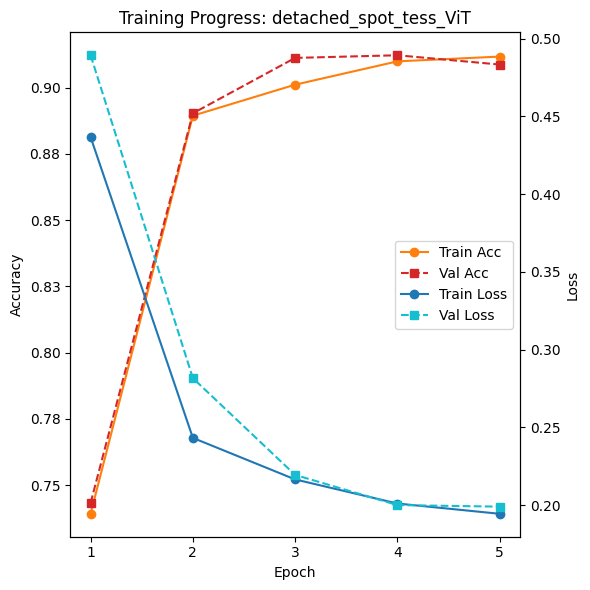

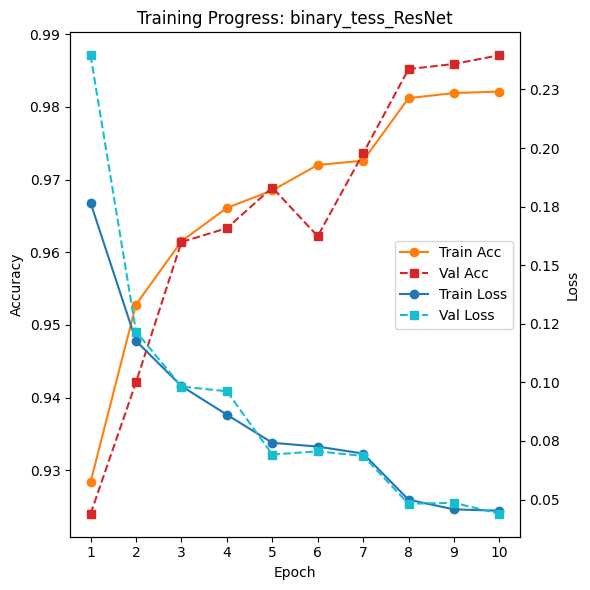

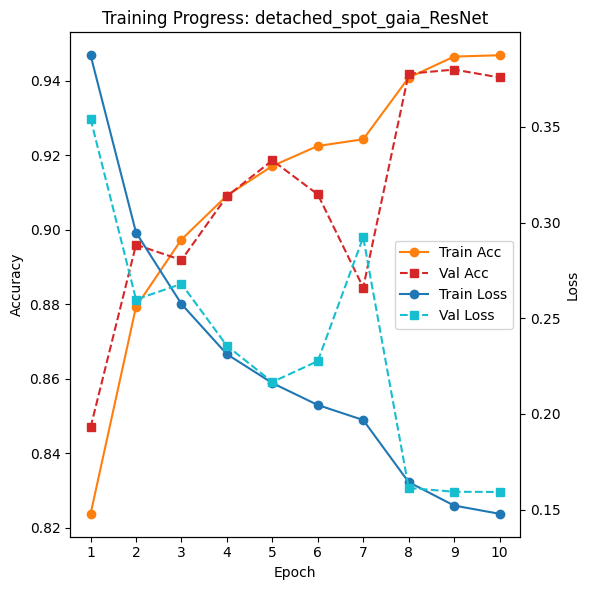

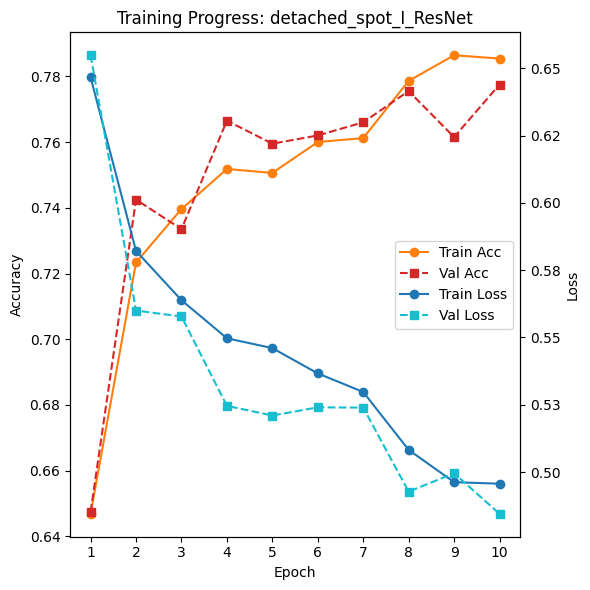

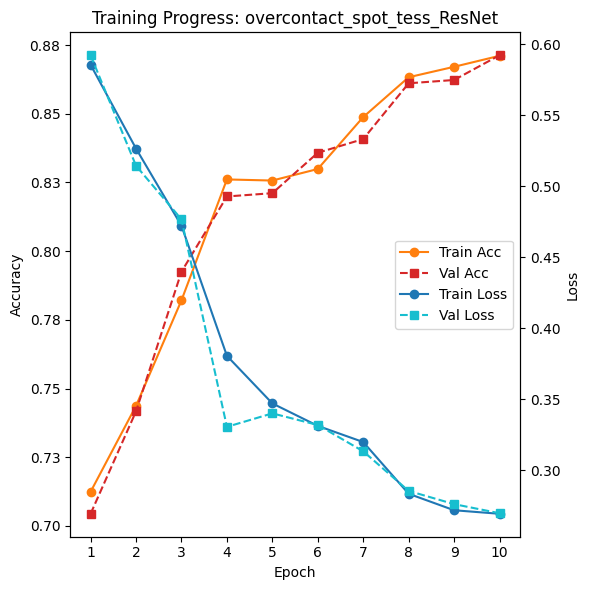

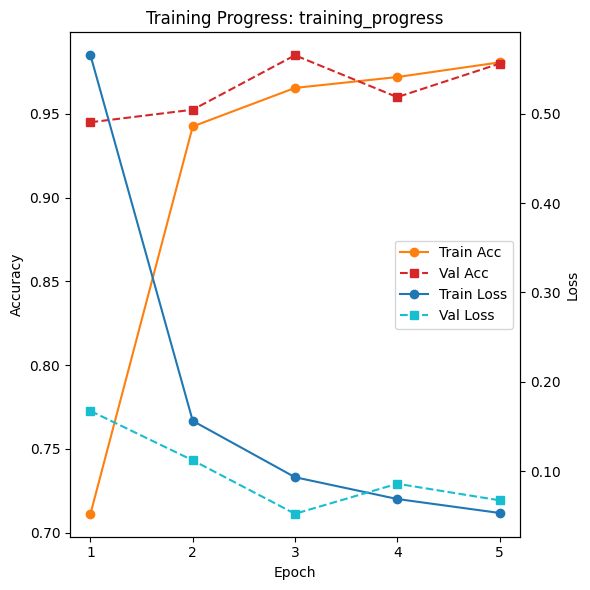

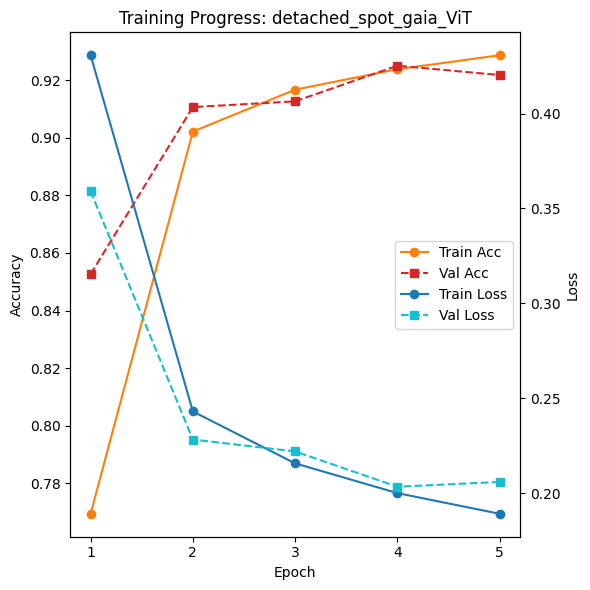

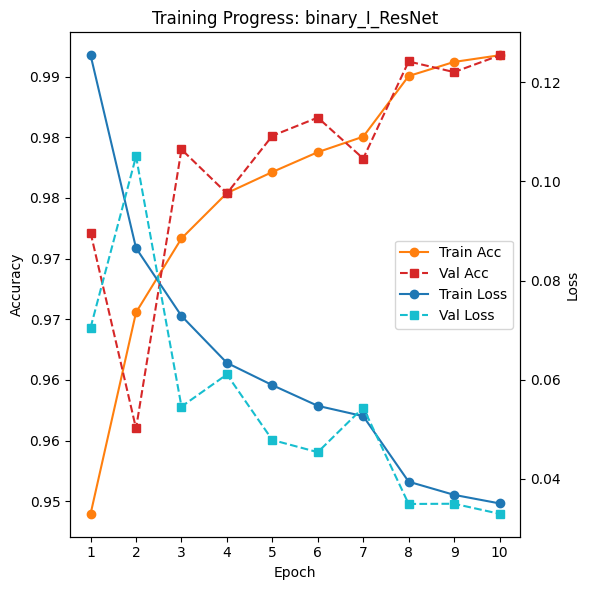

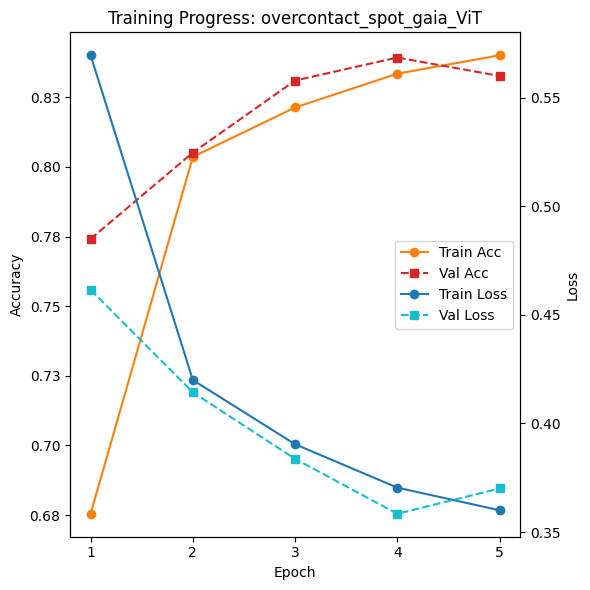

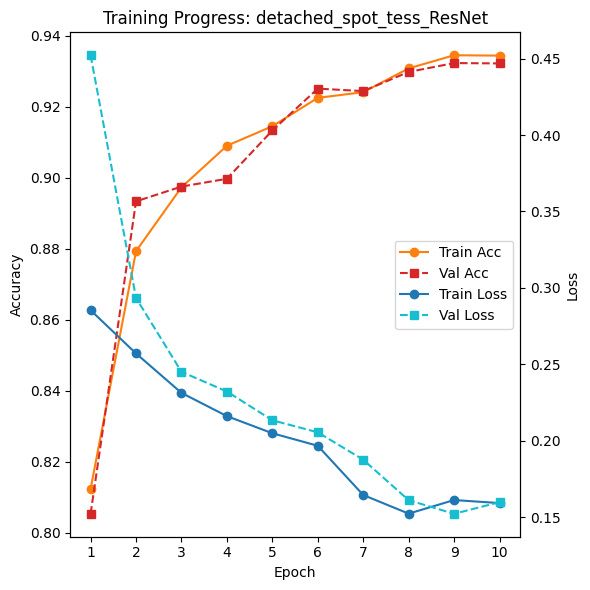

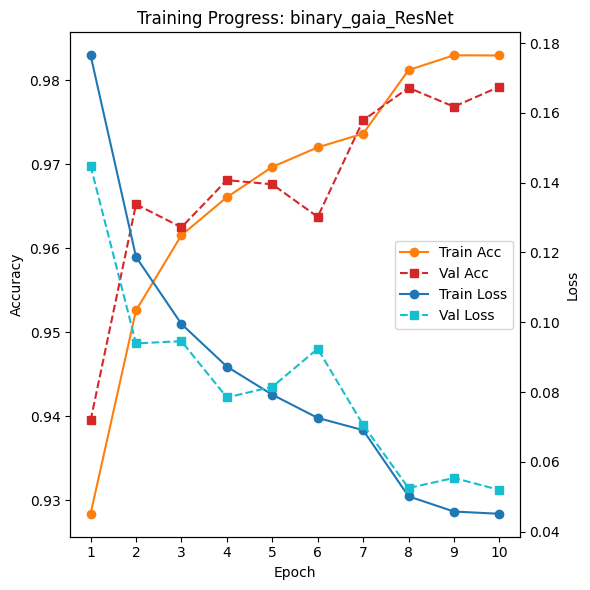

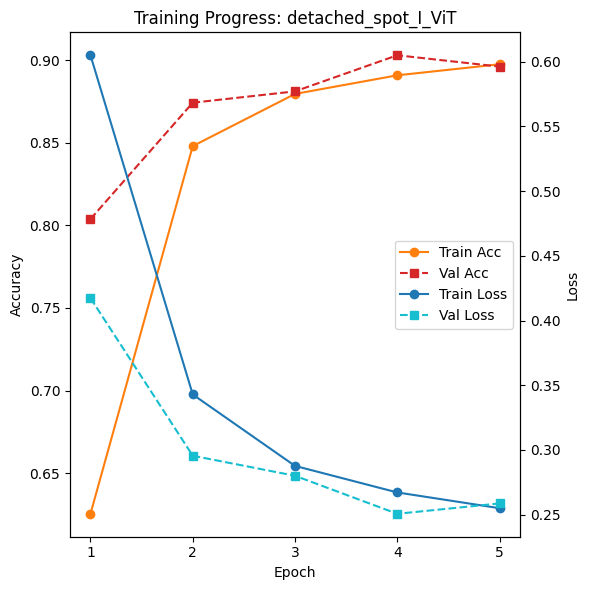

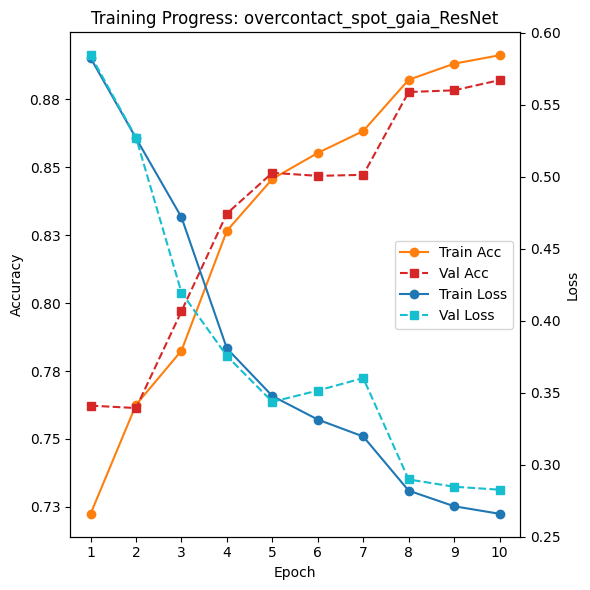

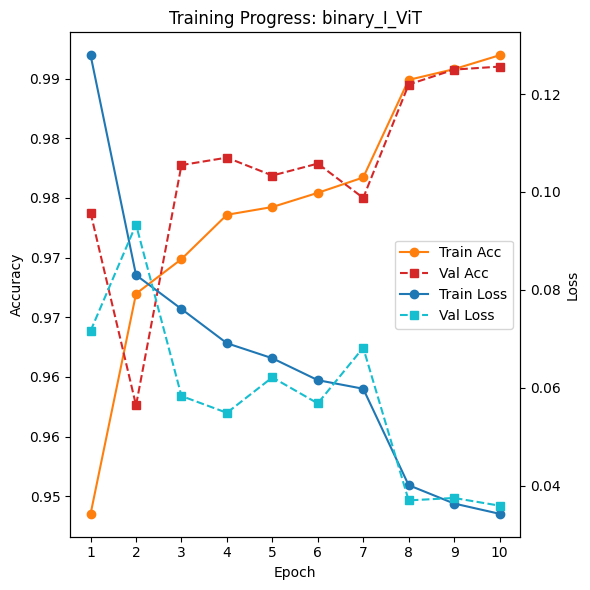

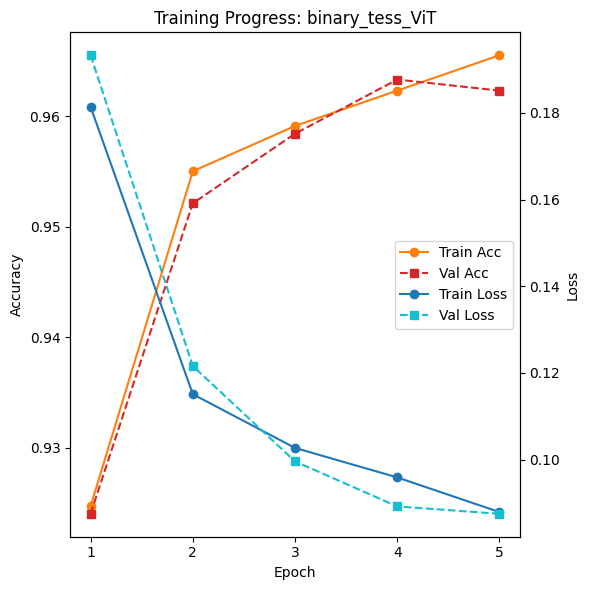

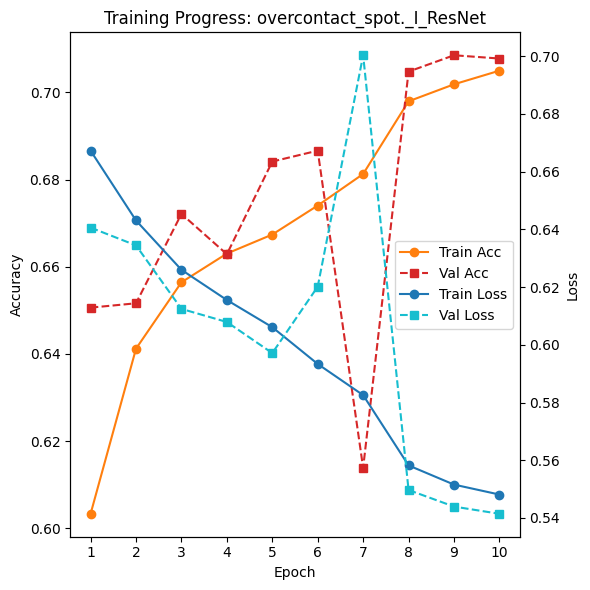

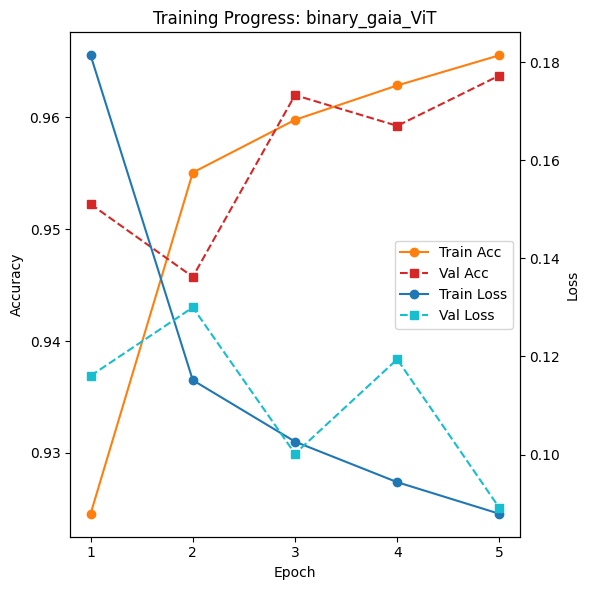

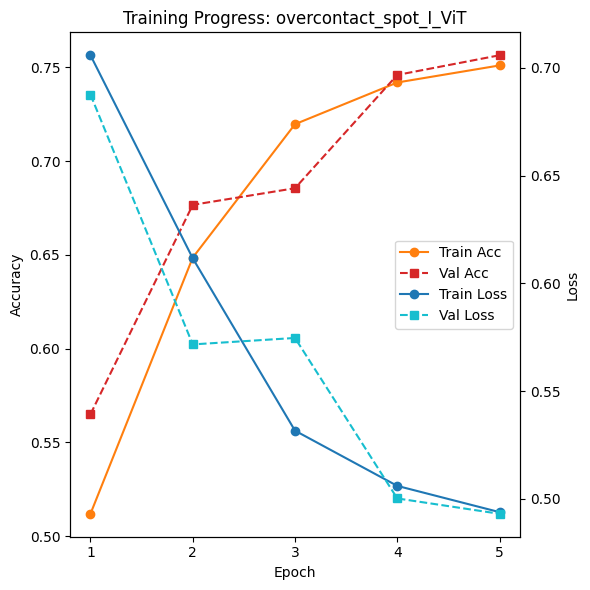

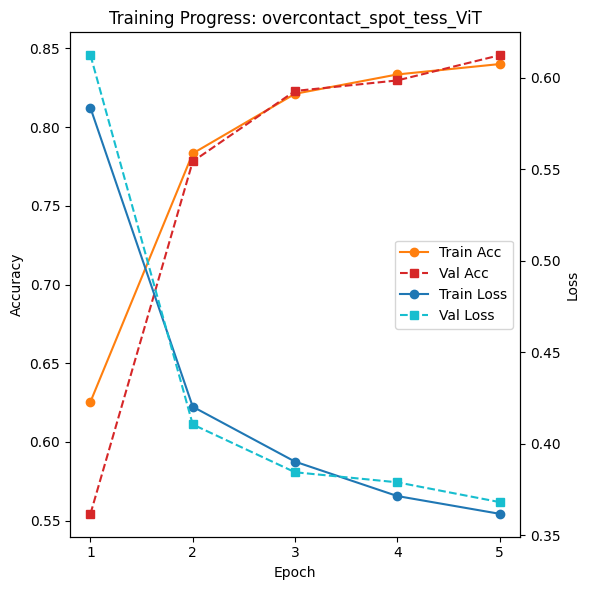

In [8]:
import os
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Path to progress directory
progress_dir = '../models/progress'

# List all JSON files for training progress
progress_files = [f for f in os.listdir(progress_dir) if f.endswith('.json')]

histories = {}
for fname in progress_files:
    model_name = fname.replace('training_progress_', '').replace('.json', '')
    fpath = os.path.join(progress_dir, fname)
    try:
        with open(fpath, 'r') as f:
            hist = json.load(f)
        # Accept both flat and nested formats
        if all(k in hist for k in ['train_loss', 'val_loss', 'train_acc', 'val_acc']):
            histories[model_name] = hist
        elif 'history' in hist:
            histories[model_name] = hist['history']
        else:
            print(f'No recognized training history in {fname}')
    except Exception as e:
        print(f'Error loading {fname}: {e}')

# Plot for each model: accuracy (left axis) and loss (right axis) on one graph, handling different lengths
for model_name, hist in histories.items():
    fig, ax1 = plt.subplots(figsize=(6, 6))
    color_acc_train = 'tab:orange'
    color_acc_val = 'tab:red'
    color_loss_train = 'tab:blue'
    color_loss_val = 'tab:cyan'
    # Accuracy curves (left axis)
    if 'train_acc' in hist and isinstance(hist['train_acc'], list) and len(hist['train_acc']) > 0:
        epochs_acc_train = range(1, len(hist['train_acc']) + 1)
        ax1.plot(epochs_acc_train, hist['train_acc'], 'o-', label='Train Acc', color=color_acc_train)
    if 'val_acc' in hist and isinstance(hist['val_acc'], list) and len(hist['val_acc']) > 0:
        epochs_acc_val = range(1, len(hist['val_acc']) + 1)
        ax1.plot(epochs_acc_val, hist['val_acc'], 's--', label='Val Acc', color=color_acc_val)
    ax1.set_ylabel('Accuracy')
    ax1.tick_params(axis='y')
    ax1.set_xlabel('Epoch')
    # Set x-axis to show only integer values
    ax1.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
    # Format left y-axis to 2 decimal places
    ax1.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.2f'))
    ax2 = ax1.twinx()
    # Loss curves (right axis)
    if 'train_loss' in hist and isinstance(hist['train_loss'], list) and len(hist['train_loss']) > 0:
        epochs_loss_train = range(1, len(hist['train_loss']) + 1)
        ax2.plot(epochs_loss_train, hist['train_loss'], 'o-', label='Train Loss', color=color_loss_train)
    if 'val_loss' in hist and isinstance(hist['val_loss'], list) and len(hist['val_loss']) > 0:
        epochs_loss_val = range(1, len(hist['val_loss']) + 1)
        ax2.plot(epochs_loss_val, hist['val_loss'], 's--', label='Val Loss', color=color_loss_val)
    ax2.set_ylabel('Loss')
    ax2.tick_params(axis='y')
    # Format right y-axis to 2 decimal places
    ax2.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.2f'))
    # Legends
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='center right')
    plt.title(f'Training Progress: {model_name}')
    fig.tight_layout()
    plt.show()